# 패키지 와 데이터 로드

In [2]:
import time
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from konlpy.tag import Komoran

import pandas_datareader as pdr
from datetime import datetime

from scipy.cluster.hierarchy import linkage 
from scipy.cluster.hierarchy import dendrogram 

from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw

import scipy.spatial.distance as ssd

In [3]:
#df.to_pickle('C:/Users/Dohyung/Desktop/데이터 마이닝/데이터 마이닝_프로젝트/ipynb/name,code,x1,x2,x3,x,x_nonumber,morph,morph_sum,labels_kse,labels_fics.fkl')
df = pd.read_pickle('./name,code,x1,x2,x3,x,x_nonumber,morph,morph_sum,labels_kse,labels_fics.fkl') # 초기 기업개요
df_price = pd.read_pickle('./price_normal.fkl') # 정규화한 price
df_dtw_matrix = pd.read_pickle('./dtw_matrix.fkl') # 정규화한 price의 dtw matrix
df_finance = pd.read_pickle('./financial_i.fkl')
# df_word = pd.read_csv('khaiii_parsing.csv', encoding = 'euc-kr')
df_dart = pd.read_pickle('./dart_khaiii.fkl')

df_price = df_price.dropna(axis = 0)

In [4]:
df

,Unnamed: 0,name,code,x1,x2,x3,x,x_nonumber,morph,morph_sum,labels_kse,labels_fics,morph_sumdart,cluster
0,0,삼성전자,5930,"한국 및 CE, IM부문 해외 9개 지역총괄과 DS부문 해외 5개 지역총괄, Har...","세트사업에는 TV, 냉장고 등을 생산하는 CE부문과 스마트폰, 네트워크시스템, 컴퓨...","부품사업(DS부문)에서는 D램, 낸드 플래쉬, 모바일AP 등의 제품을 생산하는 반도...","한국 및 CE, IM부문 해외 9개 지역총괄과 DS부문 해외 5개 지역총괄, Har...","한국 및 CE, IM 부문 해외지역 총괄과 DS 부문 해외지역 총괄, Harman ...","['한국', '부문', '해외', '지역', '총괄', '부문', '해외', '지역...",한국 부문 해외 지역 총괄 부문 해외 지역 총괄 개 종속 기업 구성 글로벌 전자 기...,"전기,전자",휴대폰 및 관련부품,당사 본사 거점 한국 과 CE IM 부문 산하 해외 지역 총괄 DS 부문 산하 해외...,6
1,1,SK하이닉스,660,"1983년 현대전자로 설립됐고, 2001년 하이닉스반도체를 거쳐 2012년 최대주주...","주력 생산제품은 DRAM, 낸드플래쉬, MCP와 같은 메모리 반도체이며, 2007년...",2020년 10월 인텔의 NAND사업 양수를 결정함. 세계 반도체시장 점유율은 D...,"1983년 현대전자로 설립됐고, 2001년 하이닉스반도체를 거쳐 2012년 최대주주...","현대전자로 설립됐고, 하이닉스반도체를 거쳐 최대주주가 SK 텔레콤으로 바뀌면서 SK...","['현대전자', '설립', '하이', '닉스', '반도체', '최', '대주주', ...",현대전자 설립 하이 닉스 반도체 최 대주주 SK텔레콤 SK하이닉스 상호 변경 주력 ...,"전기,전자",반도체 및 관련장비,당사 현대 전자 산업 주식 회사 사명 변경 이후 주식회사 LG 반도체 합병 반도체 ...,11
2,2,NAVER,35420,"동사는 국내 1위 포털 서비스를 기반으로 광고, 쇼핑, 디지털 간편결제 사업을 영위...","웹툰, Zepeto, V LIVE 등 다양한 콘텐츠 사업을 통해서도 글로벌 사업 기...","네이버파이낸셜, 네이버 클라우드 등 연결대상 종속회사 76개를 보유함.","동사는 국내 1위 포털 서비스를 기반으로 광고, 쇼핑, 디지털 간편결제 사업을 영위...","동사는 국내 포털 서비스를 기반으로 광고, 쇼핑, 디지털 간편결제 사업을 영위하고 ...","['동사', '국내', '포털', '서비스', '기반', '광고', '쇼핑', '디...",동사 국내 포털 서비스 기반 광고 쇼핑 디지털 결제 사업 영위 공공 금융 분야 중심...,서비스업,인터넷 서비스,네이버 혁신 최고 서비스 글로벌 도전 집합체 A SET OF GLOBAL CHALL...,1
3,3,삼성바이오로직스,207940,"삼성그룹의 계열사로 2011년 4월 설립되었으며, 국내외 제약회사의 첨단 바이오의약...",2018년 cGMP 생산을 시작하여 2019년말 기준 36.2만리터 생산설비를 가동...,동사의 바이오의약품 연구개발 자회사인 삼성바이오에피스와 아키젠바이오텍은 바이오시밀러...,"삼성그룹의 계열사로 2011년 4월 설립되었으며, 국내외 제약회사의 첨단 바이오의약...","삼성 그룹의 계열사로 설립되었으며, 국내외 제약회사의 첨단 바이오의약품을 위탁 생산...","['삼성그룹', '계열사', '2011년 4월', '설립', '국내외', '제약',...",삼성그룹 계열사 2011년 4월 설립 국내외 제약 회사 첨단 바이오 의약품 위탁 생...,의약품,바이오,당사 바이오 의약품 위탁 생산 CMO 사업 세포주개발 공정 제형 분석법 세포주 개발...,4
4,4,LG화학,51910,"동사는 석유화학 사업부문, 전지 사업부문, 첨단소재 사업부문, 생명과학 사업부문, ...",연결회사는 2020년 12월 1일 전지 사업부문을 단순·물적분할하여 (주)LG에너지...,"동사는 양극재, 엔지니어링 소재, IT소재의 경쟁력을 바탕으로 고부가 제품을 중심으...","동사는 석유화학 사업부문, 전지 사업부문, 첨단소재 사업부문, 생명과학 사업부문, ...","동사는 석유화학 사업부문, 전지사업부문, 첨단소재사업부문, 생명과학사업부문, 공통 ...","['동사', '석유화학', '사업', '부문', '전지', '사업', '부문', '...",동사 석유화학 사업 부문 전지 사업 부문 첨단 소재 사업 부문 생명과학 사업 부문 ...,화학,화학,석유 화학 사업 납사 원료 에틸렌 프로필렌 부타디 벤젠 기초 유분 생산 공업 원료 ...,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,LX홀딩스,383800,동사는 인적분할로 설립된 신설회사로 2021년 5월 27일 유가증권시장에 재상장함.,"별도사업을 영위하지 않는 순수지주회사의 성격을 취하고 있으며 LX인터내셔널, LX하...","각 자회사들은 주요사업으로 상품중개업(LX인터내셔널), 건축용 플라스틱 제품제조업(...",동사는 인적분할로 설립된 신설회사로 2021년 5월 27일 유가증권시장에 재상장함....,동사는 인적분할로 설립된 신설회사로 유가증권시장에 재상장함 .별도 사업을 영위하지 ...,"['동사', '인적', '분할', '설립', '신설', '회사', '5월 27일',...",동사 인적 분할 설립 신설 회사 5월 27일 유가증권 시장 상장 별도 사업 영위 순...,금융업,복합 산업,당사 독점 규제 공정 거래 법률 상 지주 회사 기준 주식 회사 LX 인터내셔널 LX...,6
196,196,롯데하이마트,71840,"1987년 6월 하이마트로 설립된 동사는 가전제품 도소매업을 영위하며, 2020년말...",동사의 최대주주는 2008년 유진기업으로 변경된 후 2012년 10월 롯데쇼핑으로 ...,업계 1위 카테고리킬러업체로서 규모의 경제실현과 최고의 브랜드 인지도를 확보하고 있...,"1987년 6월 하이마트로 설립된 동사는 가전제품 도소매업을 영위하며, 2020년말...","하이마트로 설립된 동사는 가전제품도소매업을 영위하며, 기준 점포와 물류센터를 운영 ...","['6월', '하이', '마트', '설립', '동사', '가전제품', '도소매업',...",6월 하이 마트 설립 동사 가전제품 도소매업 영위 2020년 기준 점포 물류 센터 ...,유통업,도소매,가 사업 개요 당사 가전 제품 도 소매업 영위 매출 절대 비중 점포 가전 제품 판매...,5
197,197,LX하우시스,108670,동사는 LG그룹 계열사로 2009년 LG화학 산업재 사업부문이 분할돼 설립된 기업임.,"동사의 주요제품은 창호, 바닥재, 인조대리석 등의 건축자재와 자동차부품/원단, 인테...","동사는 국내 뿐 아니라 중국, 북미, 유럽 등의 핵심 시장에서 고객 중심의 사업 활...",동사는 LG그룹 계열사로 2009년 LG화학 산업재 사업부문이 분할돼 설립된 기업임...,동사는 LG 그룹 계열사로 LG 화학산업재 사업부문이 분할돼 설립된 기업임.동사의 ...,"['동사', 'LG그룹', '계열사', 'LG화학', '산업', '사업', '부문'...",동사 LG그룹 계열사 LG화학 산업 사업 부문 분할 설립 기업 동사 제품 호 바닥재...,화학,건축자재,당사 종속 회사 포함 건축 자재 부문 자동 차 소재 산업 필름 부문 사업 부문 구성...,5
198,198,삼양식품,3230,"동사는 1961년 유지공업과 식품도매업을 영위하기 위하여 설립되었으며, 면류, 스낵...",1960년대 식량난 극복을 위해 1963년 9월 국내 최초로 '삼양라면'을 생산함....,"미국, 러시아, 유럽을 비롯하여 중국, 동남아, 중동 등 세계 각지에 삼양라면, 불...","동사는 1961년 유지공업과 식품도매업을 영위하기 위하여 설립되었으며, 면류, 스낵...","동사는 유지공업과 식품 도매업을 영위하기 위하여 설립되었으며, 면류, 스낵류, 유제...","['동사', '유지', '공업', '식품', '도매', '영위', '설립', '면류..."

In [ ]:
# # !토크나이징
# # 핵심

# morphs=[]

# komoran = Komoran(userdic='./my_dict.txt')
# string_list = []
# for i in range(0,200):
#     noun = komoran.nouns(df_dart.iloc[i]['x2']) #morphs 로 하면, 형태소 단위로 다 쪼갬
#     morphs.append(noun)
# for j in range(0,200):
#     every_morphs = komoran.pos(df_dart.iloc[j]['x2'])
#     english = []
#     for k in every_morphs:
#         if k[1] == 'SL':
#             english.append(k[0])

#     morphs[j] += english

# df_dart["morph"]= morphs






# for i in range(0,200):
#     sum_string = ""
#     for j in range(0,len(df_dart.iloc[i]["morph"])):
#         sum_string+= (df_dart.iloc[i]["morph"][j]+ " ")
#     string_list.append(sum_string)
    
# df_dart["morph_sum"] = string_list
# df_dart

In [48]:
with_dart = []
df_dartcopy = df_dart.copy()
df_copy = df.copy()

for i in range(0,200):
    A = df_dartcopy.iloc[i]["morph_sum"]
    B = df_copy.iloc[i]["morph_sum"]
    with_dart.append(A+B)
    
df["morph_sumdart"] = with_dart
df

,name,code,x1,x2,x3,x,x_nonumber,morph,morph_sum,labels_kse,labels_fics,morph_sumdart,cluster
0,삼성전자,005930,"한국 및 CE, IM부문 해외 9개 지역총괄과 DS부문 해외 5개 지역총괄, Har...","세트사업에는 TV, 냉장고 등을 생산하는 CE부문과 스마트폰, 네트워크시스템, 컴퓨...","부품사업(DS부문)에서는 D램, 낸드 플래쉬, 모바일AP 등의 제품을 생산하는 반도...","한국 및 CE, IM부문 해외 9개 지역총괄과 DS부문 해외 5개 지역총괄, Har...","한국 및 CE, IM 부문 해외지역 총괄과 DS 부문 해외지역 총괄, Harman ...","[한국, 부문, 해외, 지역, 총괄, 부문, 해외, 지역, 총괄, 개, 종속, 기업...",한국 부문 해외 지역 총괄 부문 해외 지역 총괄 개 종속 기업 구성 글로벌 전자 기...,"전기,전자",휴대폰 및 관련부품,당사 본사 거점 한국 과 CE IM 부문 산하 해외 지역 총괄 DS 부문 산하 해외...,6
1,SK하이닉스,000660,"1983년 현대전자로 설립됐고, 2001년 하이닉스반도체를 거쳐 2012년 최대주주...","주력 생산제품은 DRAM, 낸드플래쉬, MCP와 같은 메모리 반도체이며, 2007년...",2020년 10월 인텔의 NAND사업 양수를 결정함. 세계 반도체시장 점유율은 D...,"1983년 현대전자로 설립됐고, 2001년 하이닉스반도체를 거쳐 2012년 최대주주...","현대전자로 설립됐고, 하이닉스반도체를 거쳐 최대주주가 SK 텔레콤으로 바뀌면서 SK...","[현대전자, 설립, 하이, 닉스, 반도체, 최, 대주주, SK텔레콤, SK하이닉스,...",현대전자 설립 하이 닉스 반도체 최 대주주 SK텔레콤 SK하이닉스 상호 변경 주력 ...,"전기,전자",반도체 및 관련장비,당사 현대 전자 산업 주식 회사 사명 변경 이후 주식회사 LG 반도체 합병 반도체 ...,11
2,NAVER,035420,"동사는 국내 1위 포털 서비스를 기반으로 광고, 쇼핑, 디지털 간편결제 사업을 영위...","웹툰, Zepeto, V LIVE 등 다양한 콘텐츠 사업을 통해서도 글로벌 사업 기...","네이버파이낸셜, 네이버 클라우드 등 연결대상 종속회사 76개를 보유함.","동사는 국내 1위 포털 서비스를 기반으로 광고, 쇼핑, 디지털 간편결제 사업을 영위...","동사는 국내 포털 서비스를 기반으로 광고, 쇼핑, 디지털 간편결제 사업을 영위하고 ...","[동사, 국내, 포털, 서비스, 기반, 광고, 쇼핑, 디지털, 결제, 사업, 영위,...",동사 국내 포털 서비스 기반 광고 쇼핑 디지털 결제 사업 영위 공공 금융 분야 중심...,서비스업,인터넷 서비스,네이버 혁신 최고 서비스 글로벌 도전 집합체 A SET OF GLOBAL CHALL...,1
3,삼성바이오로직스,207940,"삼성그룹의 계열사로 2011년 4월 설립되었으며, 국내외 제약회사의 첨단 바이오의약...",2018년 cGMP 생산을 시작하여 2019년말 기준 36.2만리터 생산설비를 가동...,동사의 바이오의약품 연구개발 자회사인 삼성바이오에피스와 아키젠바이오텍은 바이오시밀러...,"삼성그룹의 계열사로 2011년 4월 설립되었으며, 국내외 제약회사의 첨단 바이오의약...","삼성 그룹의 계열사로 설립되었으며, 국내외 제약회사의 첨단 바이오의약품을 위탁 생산...","[삼성그룹, 계열사, 2011년 4월, 설립, 국내외, 제약, 회사, 첨단, 바이오...",삼성그룹 계열사 2011년 4월 설립 국내외 제약 회사 첨단 바이오 의약품 위탁 생...,의약품,바이오,당사 바이오 의약품 위탁 생산 CMO 사업 세포주개발 공정 제형 분석법 세포주 개발...,4
4,LG화학,051910,"동사는 석유화학 사업부문, 전지 사업부문, 첨단소재 사업부문, 생명과학 사업부문, ...",연결회사는 2020년 12월 1일 전지 사업부문을 단순·물적분할하여 (주)LG에너지...,"동사는 양극재, 엔지니어링 소재, IT소재의 경쟁력을 바탕으로 고부가 제품을 중심으...","동사는 석유화학 사업부문, 전지 사업부문, 첨단소재 사업부문, 생명과학 사업부문, ...","동사는 석유화학 사업부문, 전지사업부문, 첨단소재사업부문, 생명과학사업부문, 공통 ...","[동사, 석유화학, 사업, 부문, 전지, 사업, 부문, 첨단, 소재, 사업, 부문,...",동사 석유화학 사업 부문 전지 사업 부문 첨단 소재 사업 부문 생명과학 사업 부문 ...,화학,화학,석유 화학 사업 납사 원료 에틸렌 프로필렌 부타디 벤젠 기초 유분 생산 공업 원료 ...,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,LX홀딩스,383800,동사는 인적분할로 설립된 신설회사로 2021년 5월 27일 유가증권시장에 재상장함.,"별도사업을 영위하지 않는 순수지주회사의 성격을 취하고 있으며 LX인터내셔널, LX하...","각 자회사들은 주요사업으로 상품중개업(LX인터내셔널), 건축용 플라스틱 제품제조업(...",동사는 인적분할로 설립된 신설회사로 2021년 5월 27일 유가증권시장에 재상장함....,동사는 인적분할로 설립된 신설회사로 유가증권시장에 재상장함 .별도 사업을 영위하지 ...,"[동사, 인적, 분할, 설립, 신설, 회사, 5월 27일, 유가증권, 시장, 상장,...",동사 인적 분할 설립 신설 회사 5월 27일 유가증권 시장 상장 별도 사업 영위 순...,금융업,복합 산업,사업 부문 재무 정보 연결 회사 부문 내역 연결 회사 부문 손익 내역 연결 회사 부...,6
196,롯데하이마트,071840,"1987년 6월 하이마트로 설립된 동사는 가전제품 도소매업을 영위하며, 2020년말...",동사의 최대주주는 2008년 유진기업으로 변경된 후 2012년 10월 롯데쇼핑으로 ...,업계 1위 카테고리킬러업체로서 규모의 경제실현과 최고의 브랜드 인지도를 확보하고 있...,"1987년 6월 하이마트로 설립된 동사는 가전제품 도소매업을 영위하며, 2020년말...","하이마트로 설립된 동사는 가전제품도소매업을 영위하며, 기준 점포와 물류센터를 운영 ...","[6월, 하이, 마트, 설립, 동사, 가전제품, 도소매업, 영위, 2020년, 기준...",6월 하이 마트 설립 동사 가전제품 도소매업 영위 2020년 기준 점포 물류 센터 ...,유통업,도소매,사업 개요 지주 회사 HOLDING COMPANY 란 회사 주식 소유 회사 주식 소...,5
197,LX하우시스,108670,동사는 LG그룹 계열사로 2009년 LG화학 산업재 사업부문이 분할돼 설립된 기업임.,"동사의 주요제품은 창호, 바닥재, 인조대리석 등의 건축자재와 자동차부품/원단, 인테...","동사는 국내 뿐 아니라 중국, 북미, 유럽 등의 핵심 시장에서 고객 중심의 사업 활...",동사는 LG그룹 계열사로 2009년 LG화학 산업재 사업부문이 분할돼 설립된 기업임...,동사는 LG 그룹 계열사로 LG 화학산업재 사업부문이 분할돼 설립된 기업임.동사의 ...,"[동사, LG그룹, 계열사, LG화학, 산업, 사업, 부문, 분할, 설립, 기업, ...",동사 LG그룹 계열사 LG화학 산업 사업 부문 분할 설립 기업 동사 제품 호 바닥재...,화학,건축자재,사업 개요 회사 현황 녹십 자홀딩스 정기 주총 지주 회사 사업 목적 승인 아 생명 ...,5
198,삼양식품,003230,"동사는 1961년 유지공업과 식품도매업을 영위하기 위하여 설립되었으며, 면류, 스낵...",1960년대 식량난 극복을 위해 1963년 9월 국내 최초로 '삼양라면'을 생산함....,"미국, 러시아, 유럽을 비롯하여 중국, 동남아, 중동 등 세계 각지에 삼양라면, 불...","동사는 1961년 유지공업과 식품도매업을 영위하기 위하여 설립되었으며, 면류, 스낵...","동사는 유지공업과 식품 도매업을 영위하기 위하여 설립되었으며, 면류, 스낵류, 유제...","[동사, 유지, 공업, 식품, 도매, 영위, 설립, 면류, 스낵, 유제품, 조미, ...",동사 유지 공업 식품 도매 영위 설립 면류 스낵 유제품

In [5]:
################################################
################## 211125 ######################
#                 여기서부터                   #
################################################
sentences = []
for i in df['morph_sumdart']:
    sentences.append(i.split())


  (0, 1824)	3
  (0, 747)	1
  (0, 4078)	2
  (0, 2000)	3
  (0, 4135)	5
  (0, 3486)	7
  (0, 3640)	5
  (0, 1754)	21
  (0, 977)	6
  (0, 1047)	2
  (0, 3205)	5
  (0, 1567)	2
  (0, 1181)	2
  (0, 2155)	1
  (0, 2546)	1
  (0, 2292)	3
  (0, 1185)	2
  (0, 2347)	2
  (0, 3756)	2
  (0, 1862)	3
  (0, 1573)	2
  (0, 1669)	7
  (0, 1408)	4
  (0, 3938)	3
  (0, 2972)	1
  :	:
  (199, 3318)	1
  (199, 1739)	2
  (199, 2721)	1
  (199, 4028)	2
  (199, 3931)	1
  (199, 364)	1
  (199, 1951)	1
  (199, 4201)	8
  (199, 2903)	2
  (199, 1575)	1
  (199, 1453)	1
  (199, 2605)	1
  (199, 2587)	1
  (199, 2368)	1
  (199, 2038)	1
  (199, 4246)	1
  (199, 3157)	1
  (199, 4086)	4
  (199, 1021)	2
  (199, 2803)	1
  (199, 2716)	1
  (199, 3517)	1
  (199, 1433)	1
  (199, 2701)	1
  (199, 4073)	1


# 기업 개요 데이터 클러스터링

In [128]:
# https://icim.nims.re.kr/post/easyMath/841      벡터화의 방법
# https://bangseogs.tistory.com/95 ######################### word2vec 과 kmeans clustering
# https://hoonzi-text.tistory.com/2     word2vec 파라미터
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=wideeyed&logNo=221349385092      word2vec 단어끼리 유사도 확인


In [6]:
#
# word2vec을 사용한 벡터화
#

from gensim.models import Word2Vec as w_to_v

In [20]:
# countvectorizer로 의미 있을 것 같은 단어들을 추출

countvectorizer = CountVectorizer(stop_words=["동사", "및", "의", "등", "부문", "주","상장","주요","설립","개","드","사업"],  
                                  min_df = 0.01, 
                                  max_df = 0.6)

data = df["morph_sumdart"].copy()
data_cv = countvectorizer.fit_transform(data)

In [21]:
cv_voca = list(countvectorizer.vocabulary_) # count vectorizer된 단어들

In [22]:
cv_voca # count vectorizer된 단어들

['본사',
 '거점',
 '한국',
 '산하',
 '해외',
 '지역',
 '총괄',
 '법인',
 '구성',
 '글로벌',
 '전자',
 '모니터',
 '냉장고',
 '세탁기',
 '에어컨',
 '스마트폰',
 '네트워크',
 '시스템',
 '컴퓨터',
 '부품',
 '모바일',
 '반도체',
 '디스플레이',
 '패널',
 '인수',
 '디지털',
 '텔레매틱스',
 '사항',
 '기타',
 '고사항',
 '사업부',
 '문별',
 '현황',
 '요약',
 '재무',
 '항목',
 '참조',
 '운영',
 '수원',
 '구미',
 '광주',
 '화성',
 '평택',
 '사업장',
 '삼성',
 '대리점',
 '전담',
 '담당',
 '운송',
 '로지텍',
 '미주',
 '유럽',
 '중동',
 '아프리카',
 '아시아',
 '등지',
 '연구',
 '활동',
 '미국',
 '복합',
 '전장',
 '포함',
 '가전제품',
 '중국',
 '제외',
 '대상',
 '반기',
 '전년',
 '동기',
 '대비',
 '증가',
 'ce',
 'ds',
 'set',
 'tv',
 'electronics',
 'technology',
 'mobile',
 'dram',
 'nand',
 'flash',
 'oled',
 'lcd',
 'device',
 'digital',
 'cis',
 'new',
 'usa',
 'california',
 'brazil',
 'sk',
 'uae',
 'africa',
 'singapore',
 'australia',
 'philippines',
 'malaysia',
 'vietnam',
 'india',
 'hong',
 'kong',
 'shanghai',
 'xii',
 'best',
 '세트',
 '플래쉬',
 '현대',
 '주식회사',
 '사명',
 '변경',
 '이후',
 '합병',
 '메모리',
 '기반',
 '그룹',
 '편입',
 '현재',
 '독일',
 '영국',
 '일본',
 '싱가포르',
 '인도',

In [23]:
# word2vec으로 기업 개요에 나온 단어들을 벡터화
w_to_v_model = w_to_v(sentences, vector_size=50, window=3, sg=1) # minimum 설정 시 다른 단어들 나옴

In [24]:
w_to_v_model

In [25]:
word_vectors = w_to_v_model.wv
model_voca = word_vectors.key_to_index

len(list(model_voca))

2763

In [26]:
model_voca

{'사업': 0,
 '등': 1,
 '시장': 2,
 '부문': 3,
 '당사': 4,
 '회사': 5,
 '산업': 6,
 '제품': 7,
 '생산': 8,
 '판매': 9,
 '서비스': 10,
 '개발': 11,
 '국내': 12,
 '성장': 13,
 '매출': 14,
 '지속': 15,
 '운영': 16,
 '투자': 17,
 '확대': 18,
 '기준': 19,
 '고객': 20,
 '영업': 21,
 '기업': 22,
 '기술': 23,
 '증가': 24,
 '해외': 25,
 '영위': 26,
 '설비': 27,
 '수': 28,
 '중': 29,
 '수익': 30,
 '글로벌': 31,
 '제공': 32,
 '것': 33,
 '대비': 34,
 '연결': 35,
 '확보': 36,
 '제조': 37,
 '기반': 38,
 '설립': 39,
 '수요': 40,
 '종속': 41,
 '관리': 42,
 '정비': 43,
 '브랜드': 44,
 '공급': 45,
 '강화': 46,
 '경쟁력': 47,
 '발전': 48,
 '중국': 49,
 '매출액': 50,
 '기타': 51,
 '세계': 52,
 '상품': 53,
 '한국': 54,
 '수행': 55,
 '소재': 56,
 '금융': 57,
 '물류': 58,
 '안정': 59,
 '보유': 60,
 '에너지': 61,
 '전년': 62,
 '업체': 63,
 '규모': 64,
 '자동차': 65,
 '전문': 66,
 '동사': 67,
 '자회사': 68,
 '관련': 69,
 '신규': 70,
 '분야': 71,
 '경영': 72,
 '공사': 73,
 '지역': 74,
 '법인': 75,
 '구축': 76,
 '바탕': 77,
 '영향': 78,
 '건설': 79,
 '지주회사': 80,
 '타이어': 81,
 '미국': 82,
 '유통': 83,
 '특성': 84,
 '유지': 85,
 '자산': 86,
 '개선': 87,
 '경쟁': 88,
 '부품': 89,
 '중심': 90,
 '

In [27]:
final_voca = list(set(model_voca).intersection(cv_voca)) # count vectorizer된 단어들과 model 단어들의 교집합

In [28]:
len(final_voca)

2167

In [29]:
# 원래 문장에서 count vectorize를 했을 때 어떤 단어가 들어가는지 확인
for sentence in sentences:
    print(list(set(sentence).intersection(set(final_voca))))

['기타', '본사', '광주', '항목', '컴퓨터', '아프리카', '전년', '냉장고', '총괄', '참조', '에어컨', '미주', '복합', '지역', '재무', '전장', '시스템', '스마트폰', '수원', '포함', '화성', '거점', '현황', '문별', '동기', '디스플레이', '사항', '사업장', '법인', '아시아', '대상', '유럽', '패널', '요약', '산하', '중국', '등지', '네트워크', '인수', '제외', '증가', '운영', '한국', '전자', '대리점', '삼성', '구성', '세탁기', '미국', '운송', '가전제품', '부품', '담당', '해외', '디지털', '고사항', '전담', '연구', '반기', '모니터', '글로벌', '중동', '활동', '모바일', '반도체', '사업부', '평택', '대비']
['분류', '기록', '이천', '참조', '구축', '상호', '시스템', '현대', '활용', '완료', '대주주', '분야', '주력', '내용', '대만', '시설', '일반', '양수', '누계', '법인', '진출', '병행', '독일', '영국', '이후', '메모리', '준공', '점유율', '현재', '공시', '중심', '중국', '하이', '구분', '최신', '결정', '반면', '전자', '10월', '예정', '기능', '정보', '주식회사', '청주', '미국', '사무소', '편입', '홍콩', '일부', '매출액', '서류', '반기', '저장', '소재', '인도', '기반', '변경', '합병', '반도체', '사명', '전원', '세계', '그룹', '설치', '글로벌', '싱가포르', '일본']
['기술', '금융', '클라우드', '신규', '쇼핑', '제공', '분야', '내용', '문별', '현황', '기존', '동력', '환경', '진행', '강화', '광고', '공공', '대상', '선제', '안정', '유지', '중심', '도약', '일상', '동

In [30]:
s = [] # (count vector로 나누어진 모든 단어들)과 (토큰화된 문장)들과의 거리 matrix

for sentence in sentences:
    dist = [0] * len(final_voca) # 거리의 평균값을 각 문서 벡터의 원소로, dist 리스트는 각 단어와의 거리
    tokens_of_sentence = list(set(sentence).intersection(set(final_voca))) # 하나의 문서를 count에 따라 선별된 토큰들로
    # print(tokens_of_sentence)
    
    for i, word in enumerate(final_voca): # word: 기준이 되는 단어(세로)
        for j, token in enumerate(tokens_of_sentence): # 문서의 각 단어들(가로)에 대해 거리를 계산해서 더해 나감
            dist[i] += word_vectors.similarity(word, token)
        dist[i] = dist[i] / len(tokens_of_sentence) # 다 더했으면 평균 구함
        if i % 100 ==0:
            print(i)
    
    s.append(dist)
    

In [31]:
df_s = pd.DataFrame(s)
df_s.index = df['name']
df_s

,0,1,2,3,4,5,6,7,8,9,...,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166
name,,,,,,,,,,,,,,,,,,,,,
삼성전자,0.730384,0.730188,0.742491,0.687518,0.752257,0.730848,0.766868,0.627128,0.760131,0.761191,...,0.706471,0.755746,0.732570,0.712153,0.649568,0.677944,0.755915,0.566057,0.750833,0.755753
SK하이닉스,0.732868,0.725111,0.764748,0.673103,0.771088,0.750286,0.781890,0.601394,0.778547,0.774565,...,0.731621,0.776752,0.757148,0.735934,0.677293,0.685088,0.772497,0.555658,0.769389,0.768220
NAVER,0.653206,0.670231,0.710630,0.608127,0.753794,0.775968,0.765555,0.552027,0.758052,0.783807,...,0.750504,0.723642,0.768680,0.763387,0.682198,0.739686,0.762305,0.693216,0.745348,0.734550
삼성바이오로직스,0.691861,0.685100,0.762100,0.643270,0.783535,0.802418,0.779704,0.554227,0.789054,0.780530,...,0.783172,0.754843,0.779440,0.770138,0.725567,0.745292,0.774556,0.671075,0.784359,0.772639
LG화학,0.700083,0.692877,0.734370,0.656305,0.769152,0.780164,0.764577,0.540795,0.776768,0.765761,...,0.767000,0.748993,0.755200,0.738600,0.716109,0.721128,0.765886,0.599459,0.773292,0.771979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LX홀딩스,0.744300,0.743970,0.791569,0.689265,0.823444,0.825704,0.823565,0.568408,0.829474,0.820289,...,0.815578,0.805228,0.817080,0.800878,0.761994,0.751105,0.822534,0.645678,0.825125,0.821076
롯데하이마트,0.737732,0.745520,0.708988,0.694382,0.741795,0.712136,0.757681,0.637054,0.741805,0.779188,...,0.687142,0.753136,0.724802,0.703403,0.636616,0.665965,0.752171,0.537343,0.730596,0.729756
LX하우시스,0.741352,0.742134,0.742226,0.693350,0.770872,0.758688,0.779267,0.618088,0.774805,0.794125,...,0.739705,0.770568,0.756819,0.733588,0.688655,0.708525,0.777295,0.579642,0.766435,0.767223


In [38]:
#df_s.to_pickle('./word2vec_min001max06_vector50window3sg1.fkl')
df_s = pd.read_pickle('./word2vec_min001max06_vector50window3sg1.fkl')

<AxesSubplot:>

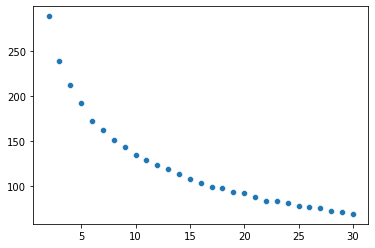

In [32]:
# elbow

clusters_range = list(range(2, 31))
inertia = []

for i in list(range(2, 31)):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(s)
    inertia.append(kmeans.inertia_)

sns.scatterplot(x=clusters_range, y=inertia)

########################################################

In [210]:
# 실루엣
# https://steadiness-193.tistory.com/285

from sklearn.metrics import silhouette_score

k_range = range(2, 15)
best_n = -1
best_silhouette_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(s)
    clusters = kmeans.predict(s)
    
    score = silhouette_score(s, clusters)
    print('k :', k, 'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score
        
print('best n :', best_n, 'best score :', best_silhouette_score)

k : 2 score : 0.3063361645716632
k : 3 score : 0.23150529980105822
k : 4 score : 0.22267129196780744
k : 5 score : 0.21743196125094222
k : 6 score : 0.21613718451793962
k : 7 score : 0.19286668183806582
k : 8 score : 0.20416791466634743
k : 9 score : 0.20179088756685373
k : 10 score : 0.20861908141418803
k : 11 score : 0.19819796016111732
k : 12 score : 0.1838297820654315
k : 13 score : 0.19181085756828523
k : 14 score : 0.18681153918255944
best n : 2 best score : 0.3063361645716632


In [39]:
kmeans = KMeans(n_clusters = 7, random_state = 42)
kmeans.fit(s)
clusters = kmeans.predict(s)

centers = kmeans.cluster_centers_

In [220]:
clusters

array([5, 5, 6, 4, 4, 6, 0, 1, 4, 4, 1, 1, 1, 1, 1, 4, 5, 2, 0, 2, 6, 0,
       2, 2, 6, 0, 0, 1, 1, 6, 0, 1, 4, 2, 0, 4, 1, 5, 5, 5, 1, 4, 2, 6,
       1, 4, 1, 0, 1, 6, 5, 1, 1, 0, 2, 4, 2, 1, 5, 5, 5, 4, 2, 5, 2, 5,
       5, 1, 4, 1, 6, 0, 0, 5, 6, 6, 4, 5, 0, 0, 1, 0, 4, 2, 1, 0, 3, 1,
       5, 6, 0, 1, 2, 4, 2, 6, 6, 6, 4, 4, 1, 0, 0, 1, 1, 3, 2, 5, 1, 0,
       6, 4, 1, 2, 1, 3, 1, 1, 1, 0, 6, 6, 2, 4, 1, 3, 5, 4, 3, 6, 1, 1,
       1, 6, 5, 0, 4, 2, 3, 6, 4, 1, 4, 5, 0, 5, 4, 6, 2, 3, 6, 0, 0, 5,
       3, 4, 1, 0, 2, 1, 0, 1, 5, 6, 1, 6, 4, 4, 6, 4, 1, 1, 5, 6, 5, 1,
       4, 1, 1, 6, 6, 5, 5, 2, 5, 5, 2, 2, 4, 4, 1, 5, 1, 2, 1, 2, 3, 5,
       4, 6])

In [44]:
# 데이터 프레임 형태로 클러스터 결과 확인

df["cluster"]= clusters

df_groupby_cluster = df.groupby('cluster')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df.groupby('cluster')['name'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')


['카카오뱅크', 'SK텔레콤', '신한지주', 'SK바이오사이언스', 'LG', '삼성전기', '고려아연', 'LG유플러스', '강원랜드', 'CJ제일제당', '삼성엔지니어링', '현대중공업지주', 'GS건설', 'OCI', '에스원', '씨에스윈드', '효성티앤씨', '하이트진로', '신세계', '롯데정밀화학', '대웅', '동국제강', '녹십자홀딩스', '대한유화', '영풍', '현대그린푸드', '영진약품', '현대홈쇼핑', '넥센타이어', '현대두산인프라코어', 'LX홀딩스']


['NAVER', '카카오', 'SK', '한국전력', '하나금융지주', '삼성에스디에스', '아모레퍼시픽', '대한항공', '기업은행', '한화솔루션', '한국조선해양', 'LG디스플레이', '유한양행', '아모레G', '삼성카드', '삼성중공업', '두산퓨얼셀', '한화시스템', 'KCC', 'BGF리테일', '제일기획', '포스코인터내셔널', '한전기술', '현대엘리베이', 'LS ELECTRIC', '금호타이어', '종근당', 'SK네트웍스', '세방전지', 'LX인터내셔널', '한세실업']


['GS리테일', '롯데쇼핑', 'DL이앤씨', '한화에어로스페이스', '효성', '후성', '두산', 'DL']


['삼성바이오로직스', '현대모비스', 'KB금융', 'LG전자', '하이브', 'SK아이이테크놀로지', 'HMM', '포스코케미칼', 'KT', '롯데케미칼', '현대제철', 'DB손해보험', '이마트', '한국가스공사', '한진칼', '호텔신라', 'CJ대한통운', '팬오션', '녹십자', '만도', '키움증권', '한샘', '현대로템', '대우조선해양', 'DB하이텍', 'SK케미칼', 'LS', '대웅제약', '이노션', '태광산업', 'KG동부제철', '한올바이오파마', '화승엔터프라이즈', '한국콜마', '보령제약', '쿠쿠홀딩스', '일양약품']


['현대차', '기아', '셀트리온', 'POSCO', '크래프톤', 'SK이노베이션', '삼성물산'

<IPython.core.display.Javascript object>


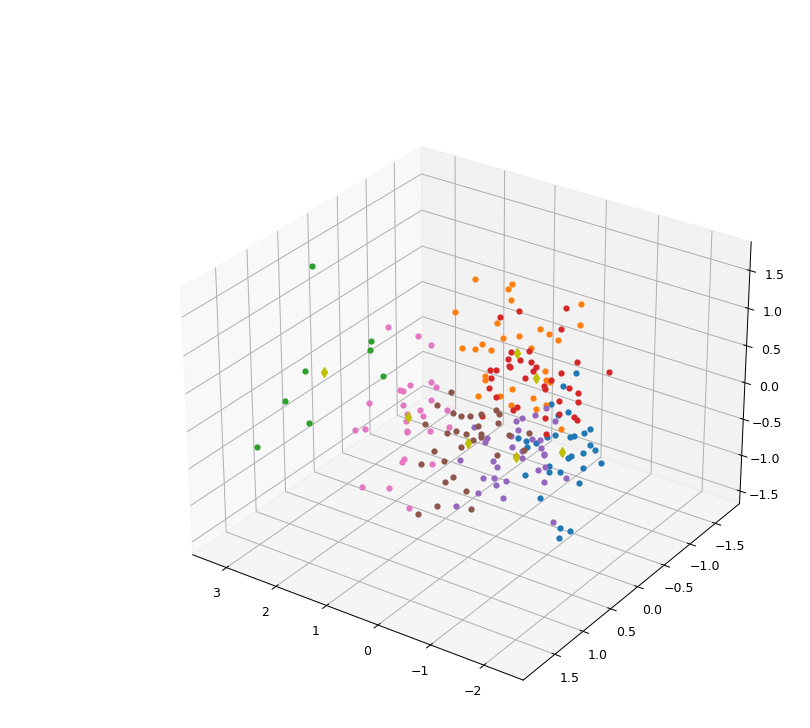

In [42]:
# PCA 차원 축소
%matplotlib notebook
using_pca = PCA(n_components=3)
using_pca.fit(df_s)
pca= using_pca.transform(df_s)
centers_trans= using_pca.transform(centers)

xs, ys, zs = pca[:, 0], pca[:, 1], pca[:, 2]

df_plot = pd.DataFrame(dict(x=xs, y=ys, z=zs, label=clusters))
groups = df_plot.groupby('label')


fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection = '3d')
ax.margins(0.05)
colors = {0:'r', 1: 'b', 2: 'k', 3: 'm', 4: 'c', 5: 'g', 6: 'w'}
for idx, group in groups:
    ax.plot(group.x, group.y, group.z ,marker='o', linestyle='', ms=5, mec='none')
    ax.set_aspect('auto')
    ax.tick_params(        axis= 'x',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off')
    ax.tick_params(        axis= 'y',
        which='both',
        left='off',
        top='off',
        labelleft='off')
    ax.tick_params(        axis= 'z',
        which='both',
        left='off',
        top='off',
        labelleft='off')



ax.plot(centers_trans[:,0],centers_trans[:,1],centers_trans[:,2], c='y', zorder=100, marker='d', linestyle='')
plt.show()



##########################################################################
############## 여기까지입니다 ############################################
##########################################################################

<IPython.core.display.Javascript object>


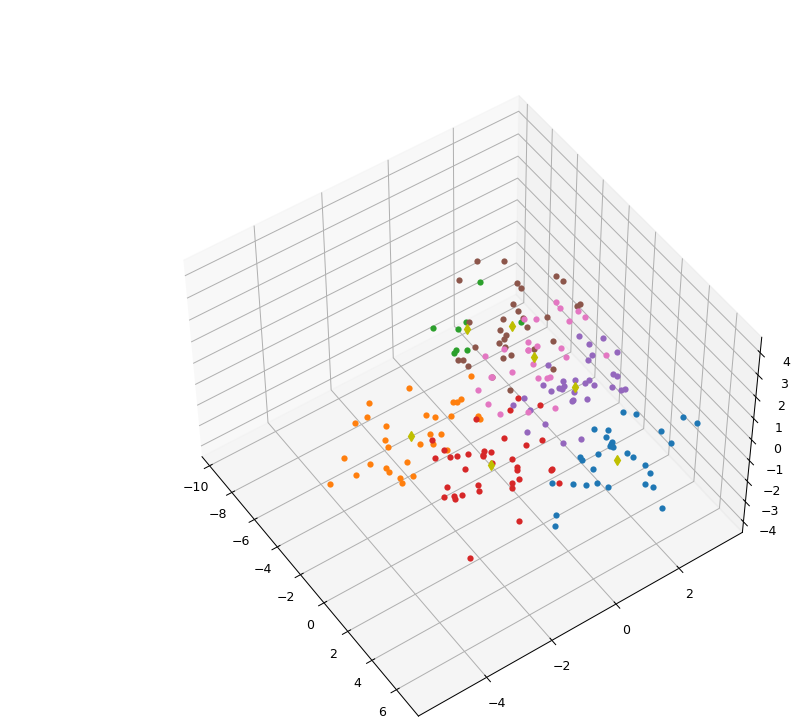

In [43]:
#LDA 차원축소
lda = LinearDiscriminantAnalysis(n_components=3)

#학습
lda.fit(df_s, clusters)
#변형
data_lda = lda.transform(df_s)
centers_trans= lda.transform(centers)

#DataFrame 생성
lda_columns=['lda_component_1','lda_component_2','lda_component_3']
DF_lda = pd.DataFrame(data_lda, columns=lda_columns)
DF_lda['target']=clusters


#축 지정
xs, ys, zs = data_lda[:, 0], data_lda[:, 1], data_lda[:, 2]

df_plot = pd.DataFrame(dict(x=xs, y=ys, z=zs, label=clusters))
groups = df_plot.groupby('label')

markers=['^', 's', 'o','d','*']
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection = '3d')
ax.margins(0.05)
colors = {0:'r', 1: 'b', 2: 'k', 3: 'm', 4: 'c', 5: 'g', 6: 'w'}
for idx, group in groups:
    ax.plot(group.x, group.y, group.z ,marker='o', linestyle='', ms=5, mec='none' )
    ax.set_aspect('auto')
    ax.tick_params(        axis= 'x',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off')
    ax.tick_params(        axis= 'y',
        which='both',
        left='off',
        top='off',
        labelleft='off')
    ax.tick_params(        axis= 'z',
        which='both',
        left='off',
        top='off',
        labelleft='off')



ax.plot(centers_trans[:,0],centers_trans[:,1],centers_trans[:,2], c='y', zorder=100, marker='d', linestyle='')
plt.show()



In [45]:
# from yellowbrick.cluster import SilhouetteVisualizer

ImportError: cannot import name 'safe_indexing' from 'sklearn.utils' (c:\users\pc\anaconda3\envs\dm_project\lib\site-packages\sklearn\utils\__init__.py)